In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [24]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

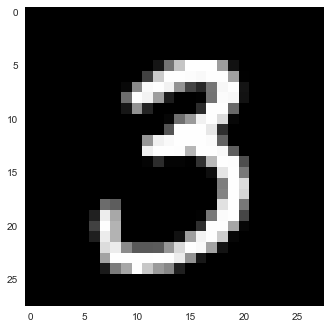

In [26]:
plt.style.use('seaborn')
plt.imshow(x_test[90], cmap='gray')
plt.grid(False)
plt.show()

In [27]:
X = x_test.reshape(-1, 28*28)
y = y_test

In [28]:
X.shape

(10000, 784)

## Step 1 - Preprocessing 

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

In [31]:
X_ = sc.fit_transform(X)

In [32]:
X_.shape

(10000, 784)

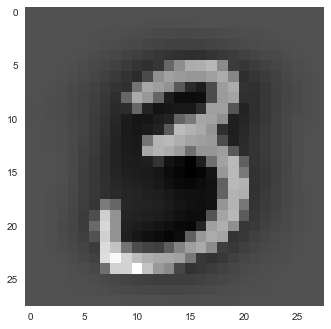

In [33]:
plt.imshow(X_[90].reshape((-1, 28)), cmap='gray')
plt.grid(False)
plt.show()

## Sklearn PCa

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)#reducing 784 components to just 2

In [36]:
Z_pca = pca.fit_transform(X_)

In [37]:
Z_pca.shape

(10000, 2)

In [38]:
Z_pca

array([[-5.45836943,  6.41418616],
       [ 2.80444725, -8.02788004],
       [-7.41127419, -3.8642193 ],
       ...,
       [-5.00435117,  1.15400361],
       [-1.42054599, -4.42011611],
       [13.14247924, -4.26367947]])

In [39]:
pca.explained_variance_# means these two components explaning 41+28 percent of the whole data

array([41.39893397, 28.35105752])

# Custom PCA

In [40]:
import numpy as np

### step 2 - Covariance Matrix

covarience matrix = transpose(X_).X_

 -  X_.T = (n, m)
 -  X_   = (m, n)
 -  dot product(covarince) = (n, n)

In [41]:
covar = np.dot(X_.T, X_)

In [42]:
covar.shape

(784, 784)

### Step 3 - Compute eigen vecctors using pca

In [43]:
from numpy.linalg import svd?

Object `svd` not found.


In [ ]:
from numpy.linalg import svd

In [44]:
from numpy.linalg import svd

In [45]:
U, S, V = svd(covar)

In [46]:
U.shape

(784, 784)

In [47]:
Ured = U[:, :2]

In [48]:
Ured.shape

(784, 2)

### Step 4 - Project of Data on New axis (components)

In [49]:
z = np.dot(X_, Ured)

In [50]:
z.shape

(10000, 2)

In [51]:
z    #same as Z_pca from sklearn

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Data Visualisation

In [52]:
import pandas as pd

In [53]:
new_datset = np.hstack((z, y.reshape(-1, 1)))

In [54]:
dataframe = pd.DataFrame(new_datset, columns=['PC1', 'PC2', 'label'])

In [55]:
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [56]:
import seaborn as sns

<Figure size 1500x1500 with 0 Axes>

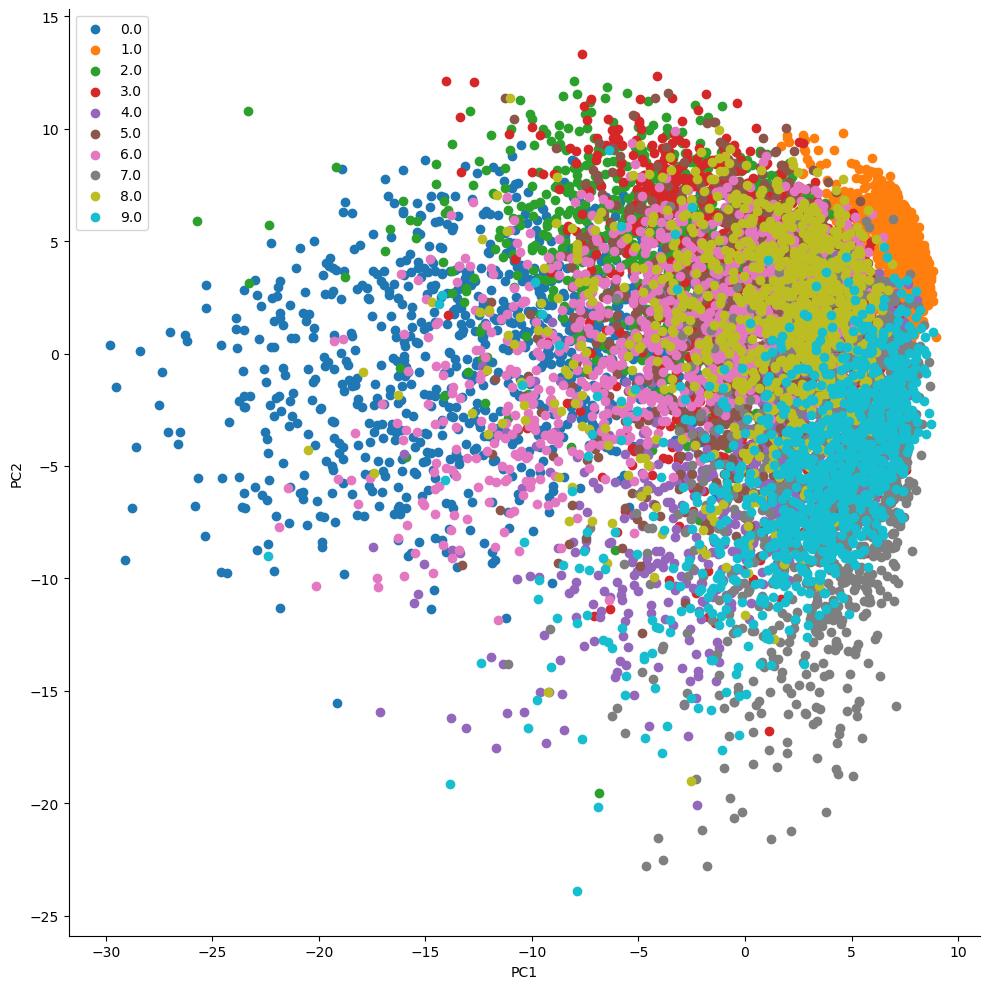

In [57]:
plt.style.use('default')
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue='label', height=10)
fg.map(plt.scatter, "PC1", "PC2")
plt.legend()
plt.show()

# PCA with 784 

In [58]:
pca = PCA()

In [59]:
Z_pca = pca.fit_transform(X_)

In [60]:
Z_pca.shape

(10000, 784)

In [61]:
#pca.explained_variance_

In [62]:
#pca.explained_variance_ratio_

In [63]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_) 

In [64]:
#cum_var_explained

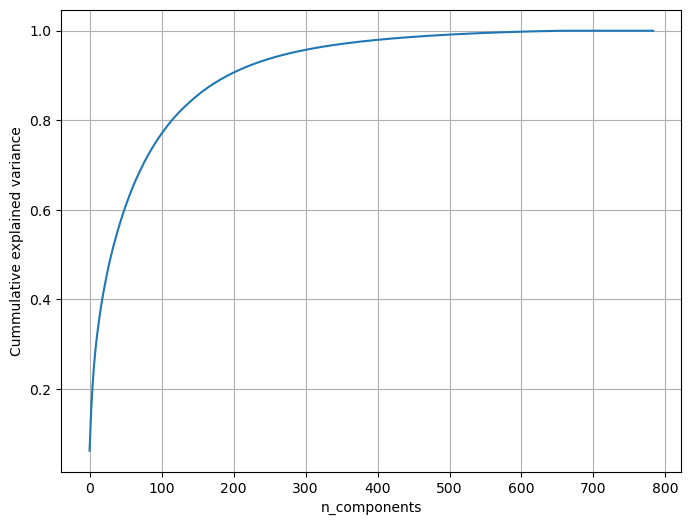

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(cum_var_explained)
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.grid(True)
plt.show()